In [1]:
using Pkg, Revise, ProgressMeter
Pkg.activate("LiquidStateTheory")
using LiquidStateTheory, Clapeyron, NLSolvers, Roots, ForwardDiff, Statistics
using PyCall, LaTeXStrings, LinearAlgebra, CSV, Tables
# import Clapeyron.NLSolvers: TrustRegion, Newton, Dogleg, NWI, NEqOptions

import PyPlot; plt = PyPlot
@pyimport matplotlib.animation as anim
@pyimport matplotlib.colors as mcolors

rcParams = PyDict(plt.matplotlib["rcParams"])

WIDTH = 1.5 * 8.3 / 2.54
DOUBLE_WIDTH = 1.5 * 17.1 / 2.54
DPI = 150
rcParams["axes.labelsize"]= 14
rcParams["axes.xmargin"]= 0
rcParams["axes.ymargin"]= .1
rcParams["lines.markersize"]= 5
rcParams["figure.dpi"]= DPI
rcParams["figure.autolayout"]= true
rcParams["figure.figsize"]= (WIDTH, 3 * WIDTH / 4)
rcParams["figure.facecolor"]= "white"
rcParams["font.size"]= 12
rcParams["grid.color"]= "0"
rcParams["grid.linestyle"]= "-"
rcParams["legend.edgecolor"]= "1"
rcParams["legend.fontsize"]= 10
rcParams["xtick.labelsize"]= 12
rcParams["ytick.labelsize"]= 12
rcParams["xtick.direction"]= "in"
rcParams["ytick.direction"]= "in"
rcParams["font.family"]= "serif"
rcParams["font.sans-serif"]= ["Helvetica"]
rcParams["text.usetex"]=false
# Create color wheel
rcParams["axes.prop_cycle"] = plt.matplotlib.cycler(color=["#4063D8","#009B72","#FFB400","#D80032","#9558B2","#01172F"])

  Activating project at `~/../pjwalker2/Projects/Polyampholyte-SURF/theory/LiquidStateTheory`
[ Info: Precompiling LiquidStateTheory [cd212ae6-d8de-5062-b616-c5ce22113279] (cache misses: include_dependency fsize change (2))


'#4063D8'
'#009B72'
'#FFB400'
'#D80032'
'#9558B2'
'#01172F'


In [43]:
seq

50-element Vector{Float64}:
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  ⋮
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0

In [151]:
seq = ones(50)
# seq[1:2:50] .*= -1
# seq[1:25] .*= -1
model = paLS(["PAL"], seq; userlocations=(;
N = [50],
Z = [-1],
))
LiquidStateTheory.a(model,1.0,[0.2]; verbose=true)

f0: -0.026085843671448984
fhs: 0.09631128470614193
fel: -0.05350235472638854
fch: -0.1646552972297143
f_conf: 0.0776080699662804


-0.0703241409551295

In [158]:
sum(seq)/50

0.12

0.02040816326530612


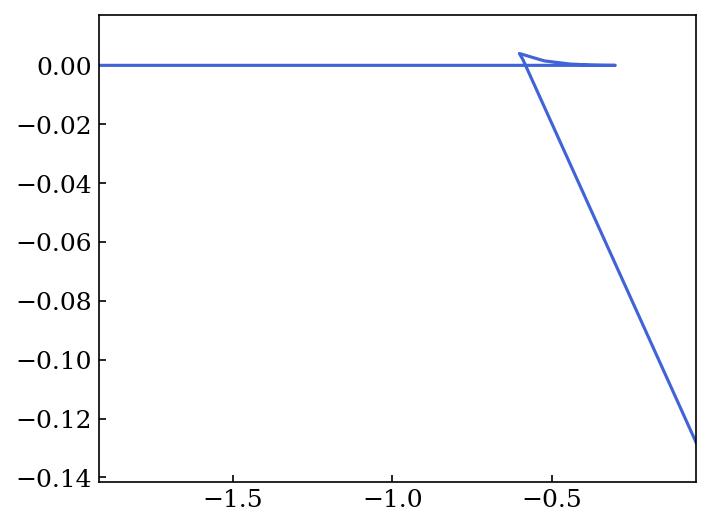

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x75b5d2aad850>

In [162]:
N = 100
lB = 1.0

seq = ones(50)
# seq[1:2:50] .*= -1
seq[1:25] .*= -1
model = paLS(["PAL"], seq; userlocations=(;
N = [50],
Z = [-1],
))

println(sum(seq[1:end-1].*seq[2:end].<0)/(50-1))


function μ_Π(model,T,ρ)
    Z = model.params.Z.values
    Znet = abs.(sum(model.sequence))
    if Znet ==0.0
        gun(x)  = LiquidStateTheory.a(model,T,[x[1]])  # return f(ρ)
        dg(x) = Clapeyron.ForwardDiff.derivative(gun,x)
        μ = dg(ρ)
        f = gun(ρ)

        return μ, f-μ*ρ
    else
        fun(x)  = LiquidStateTheory.a(model,T,[x[1],x[1]*Znet/length(model.sequence)])  # return f(ρ)
        df(x) = Clapeyron.ForwardDiff.derivative(fun,x)
        μ = df(ρ)
        f = fun(ρ)

        return μ, f-μ*ρ
    end
    
    
end

rho = exp10.(LinRange(-40,-0.5,N))

mu = zeros(N)
Pi = zeros(N)

for i in 1:N
    mu[i], Pi[i] = μ_Π(model,lB,rho[i])
end

plt.clf()
plt.plot( mu, Pi, label=L"\mu")

In [2]:
sequences = [
 "+++++++++++++++++++++++++-------------------------",# 50/50   
 "+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-",
 "+++++-----+++++-----+++++-----+++++-----+++++-----",
 "++++++++++++++++++++-+-+-+-+-+--------------------",
 "++++++++++++++-+-+-+-+-+-+-+-+-+-+-+--------------",
 "++++++++++-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+----------",
 "++++-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+----",
 "-------------------++++++++++++++++++++-+-+-+-+-+-",
 "-------------++++++++++++++-+-+-+-+-+-+-+-+-+-+-+-",
 "---------++++++++++-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-",
 "---++++-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-",
 "++++++++++++++++++++++++--------------------------",
 "++++++++++++++++++++++----------------------------",
 "++++++++++++++++++++------------------------------",
 "++++++++++++++++++--------------------------------",
 "++++++++++++++++----------------------------------",
 "++++++++++++++------------------------------------",
 "++++++++++++--------------------------------------",
 "++++++++++----------------------------------------",
 "++++++++------------------------------------------",
 "++++++--------------------------------------------",
 "++++----------------------------------------------",
 "++------------------------------------------------",
 "--------------------------------------------------",
 "+++++++++++++++++++-+-+-+-+-+---------------------",
 "+++++++++++++++++-+-+-+-+-+-----------------------",
 "+++++++++++++++-+-+-+-+-+-------------------------",
 "+++++++++++++-+-+-+-+-+---------------------------",
 "+++++++++++-+-+-+-+-+-----------------------------",
 "+++++++++-+-+-+-+-+-------------------------------",
 "+++++++-+-+-+-+-+---------------------------------",
 "+++++-+-+-+-+-+-----------------------------------",
 "+++-+-+-+-+-+-------------------------------------",
 "+-+-+-+-+-+---------------------------------------",
 "++++++++++++-+-+-+-+-+-+-+-+-+-+-+----------------",
 "++++++++++-+-+-+-+-+-+-+-+-+-+-+------------------",
 "++++++++-+-+-+-+-+-+-+-+-+-+-+--------------------",
 "++++-+-+-+-+-+-+-+-+-+-+-+------------------------",
 "++-+-+-+-+-+-+-+-+-+-+-+--------------------------",
 "++++++++-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+------------",
 "++++++-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+--------------",
 "++++-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+----------------",
 "++-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+------------------",
 "++-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+------",
 "++---++++-+++-+-++++++-++----+----+---+-++--+++--+",
 "-+-+-+++-+++++++-+----+++++-++--+++--+-----+--+++-",
 "-+---++---+----+-+-+-+++-+++--+++-++-++-+--++++-++",
 "+++---++---+-+--+-+-++--+-+-+++---++-+-++-++-----+",
 "+-+-+--+--+-+-+-+--+-++-+--+++++-+---++++-+----+-+",
 "+++-+-++++++--++-+---+++-+--+--+-+-+++---+-+++-+++",
 "--++++++-+--+++++-+++++-++++-+-+-+--+-++----+--+-+",
 "--+-+---++-+-+++--++-----++++--++--+++----++++-+--",
 "--++++----++--------+-+-++++---++++--+++++++++-+++",
 "++-+-++++--+---++---+++---+---+----+---+-+---++-++",
 "-----+++--+++++++-+----++----+++--+-------+++-+++-",
 "-+++++-----++-++-+-++++++-+--+--+----+--+--++-+-++",
 "--+++++-+-++--+-+-+++-+----++----+++-++----++---+-",
 "++++++++-++++-++-+------++--+--++++++++-+--+++--+-",
 "--+--++--+-+--+++---++++---+-++++-+---+-+-+-+-+++-",
 "-+++-+-+---++-++---+---++----+-++--++-+----+-++++-",
]

60-element Vector{String}:
 "+++++++++++++++++++++++++-------------------------"
 "+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-"
 "+++++-----+++++-----+++++-----+++++-----+++++-----"
 "++++++++++++++++++++-+-+-+-+-+--------------------"
 "++++++++++++++-+-+-+-+-+-+-+-+-+-+-+--------------"
 "++++++++++-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+----------"
 "++++-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+----"
 "-------------------++++++++++++++++++++-+-+-+-+-+-"
 "-------------++++++++++++++-+-+-+-+-+-+-+-+-+-+-+-"
 "---------++++++++++-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-"
 "---++++-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-"
 "++++++++++++++++++++++++--------------------------"
 "++++++++++++++++++++++----------------------------"
 ⋮
 "+-+-+--+--+-+-+-+--+-++-+--+++++-+---++++-+----+-+"
 "+++-+-++++++--++-+---+++-+--+--+-+-+++---+-+++-+++"
 "--++++++-+--+++++-+++++-++++-+-+-+--+-++----+--+-+"
 "--+-+---++-+-+++--++-----++++--++--+++----++++-+--"
 "--++++----++--------+-+-++++---++++--+++++++++-+++

In [43]:
function get_SCD(sequence)
    """
    Calculate the SCD for a given sequence:
    SCD = sum_(i>j) (sequence[i] * sequence[j] * sqrt(i - j))
    """
    z = [c == '+' ? 1 : -1 for c in sequence]
    SCD = 0
    Znet = abs(sum(z))
    for i in 1:length(z)
        for j in 1:i-1
            SCD += z[i] * z[j] * sqrt(i - j)
        end
    end
    # for i in 1:Znet
    #     for j in 1:i-1
    #         SCD -= sqrt(i-j)  # Account for counterions
    #     end
    # end
    # for i in 1:round(Znet/2)
    #     for j in 1:i-1
    #         SCD -= sqrt(i-j)  # Account for neutralizing salt
    #     end
    # end
    return SCD
end

get_SCD (generic function with 1 method)

In [ ]:
"""
    kappa(seq; charge_map, g=5, gset=nothing)

Compute κ (kappa) for a sequence `seq` given a `charge_map` that assigns each
symbol in the sequence an integer charge in {-1, 0, +1} (or any reals; signs matter).

By default, κ is computed for window size `g=5`. You can instead pass `gset` as a
collection of window sizes (e.g. 5:9); the function will return the average κ over
those windows, which is common in the IDP literature.

Definition sketch:
1) For each window size g, compute the average local charge asymmetry
   δ_g = ⟨(f₊^{(g)} - f₋^{(g)})²⟩, where f₊^{(g)} and f₋^{(g)} are the fractions
   of + and − residues *in the window* (zeros count toward the window length).
2) Construct two reference sequences with the same composition:
   - "Mixed" (min): as alternating as possible (+,−,+,−,...) given counts.
   - "Blocky" (max): all +, then all −, then all 0’s.
   Compute their ⟨δ_g⟩ values.
3) Normalize: κ_g = (δ_g(seq) − δ_g(mixed)) / (δ_g(blocky) − δ_g(mixed)).
Clamp to [0, 1]. If the denominator is ~0 (e.g., trivial compositions), return 0.

Returns:
- If `gset === nothing`: a single Float64 (κ for window size g)
- Else: average κ over all g ∈ gset.
"""
function kappa(seq; charge_map::AbstractDict=Dict("+"=>1,"-"=>-1, "0"=>0), g::Integer=5, gset=nothing)
    charges = _charges_from_seq(seq, charge_map)
    # println("Charges: ", charges)
    N = length(charges)
    if N == 0
        return 0.0
    end

    # choose the set of window sizes
    if gset === nothing
        gset = (g <= N) ? (g:g) : (N:N)  # handle short sequences gracefully
    else
        gset = collect(filter(x -> 1 ≤ x ≤ N, gset))
        isempty(gset) && return 0.0
    end

    # composition (counts of +, −, 0)
    npos = count(>(0), charges)
    nneg = count(<(0), charges)
    nzer = N - npos - nneg

    # build reference sequences with the same composition
    mixed_seq  = _make_mixed_sequence(npos, nneg, nzer)
    blocky_seq = _make_blocky_sequence(npos, nneg, nzer)

    ks = Float64[]
    for gg in gset
        δ_obs = _avg_delta(charges, gg)
        δ_mix = _avg_delta(mixed_seq, gg)
        δ_blk = _avg_delta(blocky_seq, gg)
        denom = δ_blk - δ_mix
        κg = if abs(denom) < 1e-12
            0.0
        else
            clamp((δ_obs - δ_mix)/denom, 0.0, 1.0)
        end
        push!(ks, κg)
    end
    return length(ks) == 1 ? ks[1] : mean(ks)
end

# --- helpers ---

# Map sequence symbols to charges
function _charges_from_seq(seq, charge_map::AbstractDict)
    if isa(seq, AbstractString)
        return [get(charge_map, c, 0) for c in collect(seq)]
    elseif isa(seq, AbstractVector)
        return z
    else
        throw(ArgumentError("seq must be a String or a Vector of symbols/letters"))
    end
end

# Average windowed asymmetry δ_g = ⟨(f+ - f-)^2⟩ over all windows of length g
function _avg_delta(charges::AbstractVector{<:Real}, g::Int)
    N = length(charges)
    if g > N
        return 0.0
    end
    # sliding window counts of positive and negative residues
    # treat zeros as neutral; they count toward window length g
    pos = map(>(0), charges)
    neg = map(<(0), charges)

    # prefix sums for O(1) window queries
    Ppos = cumsum!(zeros(Int, N), pos)
    Pneg = cumsum!(zeros(Int, N), neg)

    total = 0.0
    nwin = N - g + 1
    @inbounds for i in 1:nwin
        j = i + g - 1
        npos = Ppos[j] - (i > 1 ? Ppos[i-1] : 0)
        nneg = Pneg[j] - (i > 1 ? Pneg[i-1] : 0)
        fpos = npos / g
        fneg = nneg / g
        total += (fpos - fneg)^2
    end
    return total / nwin
end

# Construct an "as mixed as possible" sequence with the given counts.
# Greedy alternation (+, -) while supplies last, then sprinkle zeros.
function _make_mixed_sequence(npos::Int, nneg::Int, nzer::Int)
    seq = Int[]
    p, n, z = npos, nneg, nzer
    # alternate +/- as much as possible starting with the more abundant sign
    cur = (p >= n) ? +1 : -1
    while p > 0 || n > 0
        if cur == +1
            if p > 0
                push!(seq, +1); p -= 1
            elseif n > 0
                push!(seq, -1); n -= 1
            else
                break
            end
            cur = -1
        else
            if n > 0
                push!(seq, -1); n -= 1
            elseif p > 0
                push!(seq, +1); p -= 1
            else
                break
            end
            cur = +1
        end
    end
    # interleave zeros roughly evenly into the built +/- skeleton
    if z > 0
        # distribute zeros across (length(seq)+1) gaps
        gaps = length(seq) + 1
        pergap = div(z, gaps)
        remz   = z % gaps
        out = Int[]
        for i in 1:length(seq)+1
            # add zeros for this gap
            nz_here = pergap + (i <= remz ? 1 : 0)
            append!(out, zeros(Int, nz_here))
            if i <= length(seq)
                push!(out, seq[i])
            end
        end
        return out
    else
        return seq
    end
end

# Construct the "blockiest" sequence: +...+ -...- 0...0
_make_blocky_sequence(npos::Int, nneg::Int, nzer::Int) = [fill(+1, npos);
                                                          fill(-1, nneg);
                                                          fill( 0, nzer)]

# convenience: mean for AbstractVector{<:Real} without importing Statistics
mean(v::AbstractVector{<:Real}) = sum(v) / length(v)


mean (generic function with 1 method)

In [45]:
seq = "++-+--0+-+0-+"
z = [c == '+' ? 1 : c == '-' ? -1 : 0 for c in collect(seq)]
κ = kappa(z; g=5)           # κ at g = 5
κ_avg = kappa(z; gset=1:50)  # average κ over g = 3..8
println("κ(g=5) = ", κ, "   κ(3:8) = ", κ_avg)

κ(g=5) = 0.03539823008849557   κ(3:8) = 0.1551653819689101
   κ(3:8) = 0.1551653819689101


In [ ]:
for i in 1:60
    plt.clf()
    data = CSV.read("data/sequ_$(i)/lB_5.0_Γ_0.0/Rg_Re2e_A.csv", Tables.matrix; header=true)
    Rg = data[:, 1]
    Re2e = data[:, 2]
    A = data[:, 3]
    h, x, y, p = plt.hist2D(Rg,sqrt.(A), bins=100, density=true, cmin = 0, cmax=2., cmap="viridis")
    # h.set_clim(0,2.)
    # h.set_xlim(4.2, 11)
    # h.set_ylim(0,0.7)
    plt.clf()
    plt.imshow(h', origin = "lower", interpolation = "gaussian", vmin=0, vmax=2., extent=(x[1], x[end], y[1], y[end]), aspect="auto", cmap="viridis")
    # plt.clim(0,2.)
    plt.xlim(4.2, 11)
    plt.ylim(0,0.7)
    plt.savefig("figures/hist/sequ_$(i).png")
end

LoadError: InterruptException:

In [265]:
_kappa = zeros(Float64, 60)
Znet = zeros(Float64, 60)
lnQ = zeros(Float64, 60)
lB = 5.0
Γ = 0.0
for i in 1:60
    z = [c == '+' ? 1 : -1 for c in sequences[i]]
    _kappa[i] = kappa(z; g=10)  # average κ over g = 3..8
    Znet[i] = abs(sum(z)) / length(z)
    if isfile("data/sequ_$(i)/lB_$(lB)_Γ_$(Γ)/F_and_Q.csv")
        data = CSV.read("data/sequ_$(i)/lB_$(lB)_Γ_$(Γ)/F_and_Q.csv", Tables.matrix; header=true)
       
        qiqj = (z[1:end-1].*z[2:end]).*lB*exp(-Γ)
        lnQ[i] = log(data[end, 2])#+sum(qiqj)
    else
        lnQ[i] = -1000
    end
end

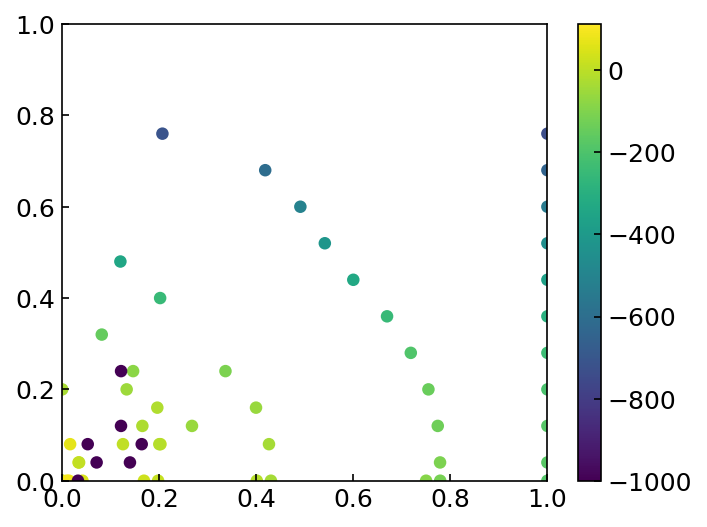

(0.0, 1.0)

In [ ]:
plt.clf()
plt.scatter(_kappa, Znet, c=lnQ, cmap="viridis")
cbar = plt.colorbar()
plt.xlim(0, 1)
plt.ylim(0, 1)

In [143]:
lnQ[seq_id]

-89.91050629383263

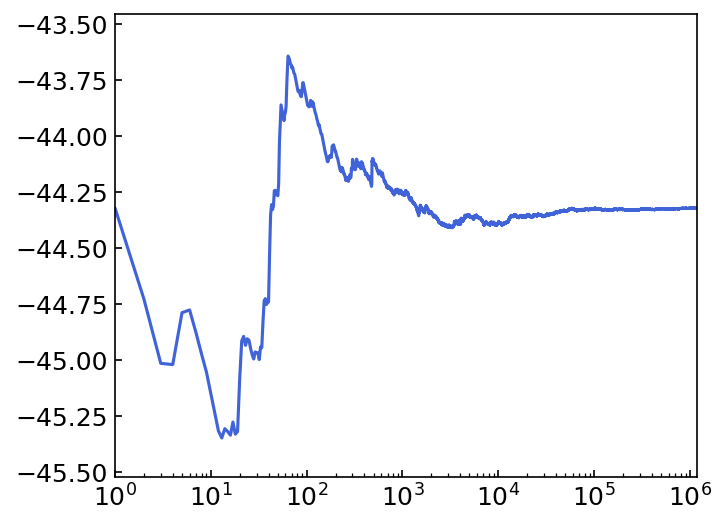

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7cd12ebd1ed0>

In [ ]:
seq_id = 10
_seq = sequences[seq_id]
lB = 5.0
Γ = 2.0

data = CSV.read("data/sequ_$(seq_id)/lB_$(lB)_Γ_$(Γ)/F_and_Q.csv", Tables.matrix; header=true)
# id_min = argmin(data[:, 1])
# println(minimum(data[:, 1]))
# data = CSV.read("data/sequ_$(seq_id)/lB_$(lB)_Γ_$(Γ)/α_samples.csv", Tables.matrix; header=true)
# α = data[id_min, :]
plt.clf()
plt.semilogx(log.(data[:, 2]), label="F")

In [185]:
z = [c == '+' ? 1 : -1 for c in _seq]
F, dF, HF = LiquidStateTheory.electrostatic_F_grad_hess(α, z; lB = 5.0, Γ = 0.0, min_sep=1)
-0.5*log(abs(det(HF)))-F+log(2pi)*(length(z)-2)/2

41.80424594131711

In [169]:
-0.5*log(abs(det(HF)))

-11.497195541489313

In [170]:
log(2pi)*(length(z)-2)/2

44.10904959382429

In [164]:
lnQ[seq_id]

-44.322301165298306

In [165]:
-F

-39.82104541906509

In [ ]:
N = 10000
sequence = ones(50)
sequence[1:Int(length(sequence)/2)] .= -1

# sequence[20:2:30] .*= -1
# sequence[1:2:Int(length(sequence))] .= -1
# sequence[6:10] .= -1
# sequence[16:20] .= -1
# sequence[26:30] .= -1
# sequence[36:40] .= -1
# sequence[46:50] .= -1
# sequence[5] = 0
# Generate random uniform angles for the sequence from pi/3 to 5pi/3
# angles = ones(length(sequence)-2)*2pi/4
# angles[1:2:end] .*=-1
# angles[Int(length(sequence)/2)-1] = pi/2.1
# angles[Int(length(sequence)/2)] = pi/2.1
lB = [1.0]

eta = 0.4

Gamma = [0.0]
# Re2e = zeros(length(Gamma),length(lB))
# angles = zeros(length(sequence)-2,N)
F = zeros(N)
for k in 1:1
    # angles = zeros(length(sequence)-2,5000)
    # angles = pi/4*ones(length(sequence)-2)
    # angles[2:2:end] .*= -1
    # # angles[1:2:end, 1] .*=-1
    # angles[Int((length(sequence)-2)/2), 1] = pi/2
    # angles[Int((length(sequence)-2)/2)+1, 1] = pi/2
    for j in 1:1
        F = zeros(N)

        F[1], dF = LiquidStateTheory.electrostatic_F_and_grad(angles, sequence; lB=lB[k], Γ=Gamma[j], η=eta, min_sep=2)
        for i in 2:N
            _, dF = LiquidStateTheory.electrostatic_F_and_grad(angles, sequence; lB=lB[k], Γ=Gamma[j], η=eta, min_sep=2)
            # idx_max = argmax(abs.(dF))
            angles .-= 0.00001*dF
            F[i], _ = LiquidStateTheory.electrostatic_F_and_grad(angles, sequence; lB=lB[k], Γ=Gamma[j], η=eta, min_sep=2)
            # println(F[i])
        end
        # _r = pairwise_distances_and_grads(angles[:,end])[1]
        # Re2e[j,k] = _r[1,end]
        # println("Gamma: ", Gamma[j], ", Re2e: ", Re2e[j,k])
        # angles[:, 1] = angles[:,end]
    end
end

In [63]:
dF

48-element Vector{Float64}:
       0.3292940188566217
      -2.3957492112113474
      -6.754359833656816
      -7.2841845143184845
      -3.657292973267051
    3165.136847963682
 -344545.0386272141
    1859.7669721479378
   -7415.157004980566
   -7771.584319970284
       2.5553764411272216e8
      -8.781788339874356e8
       2.818686229512919
       ⋮
       7.625820545398961
       7.735913999668544
       3.2280281364722616
       3.1037371061581136
      -3.27480037366741
      -6.332603576480158
      -1.6767791865942634
      -1.816804013922065
       5.0429861515039605
       0.9899966703962617
      -0.4929206233913431
       5.429595479045807

In [64]:
F

10000-element Vector{Float64}:
 -41.71409964318691
 -41.71427323362312
 -41.7144466866351
 -41.71462000236924
 -41.71479318102177
 -41.71496622272277
 -41.71513912508592
 -41.71531177238942
 -41.71547887774618
 -41.715398024972714
 -41.70433654357972
 -41.07372694438062
 -30.39313705461958
   ⋮
   2.6468285876152307e7
   2.646825327555604e7
   2.646825913068172e7
   2.6468253846007872e7
   2.6468258431516692e7
   2.6468245030170105e7
   2.646826151750377e7
   2.646827440776939e7
   2.646826624347529e7
   2.6468275180963404e7
   2.6468274455384616e7
   2.6468279311873555e7

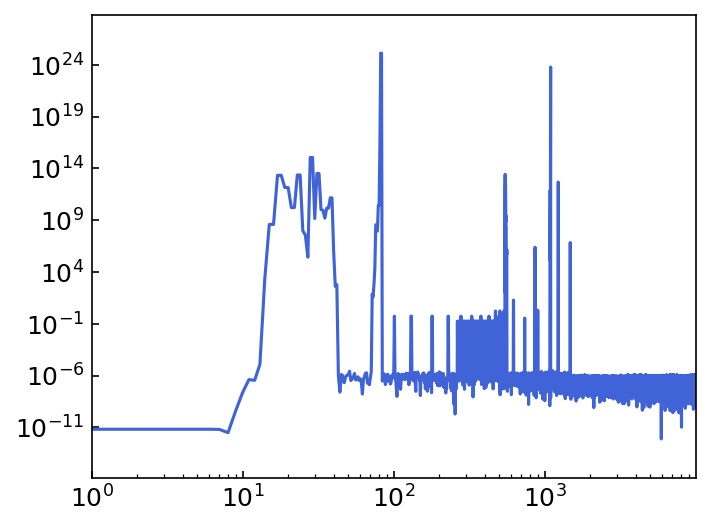

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x6ffffaf83ad0>

In [ ]:
plt.clf()
plt.loglog(abs.((F[1:end-1].-F[2:end]))./abs(F[end]))
# plt.ylim(10*F[1],-10*F[1])

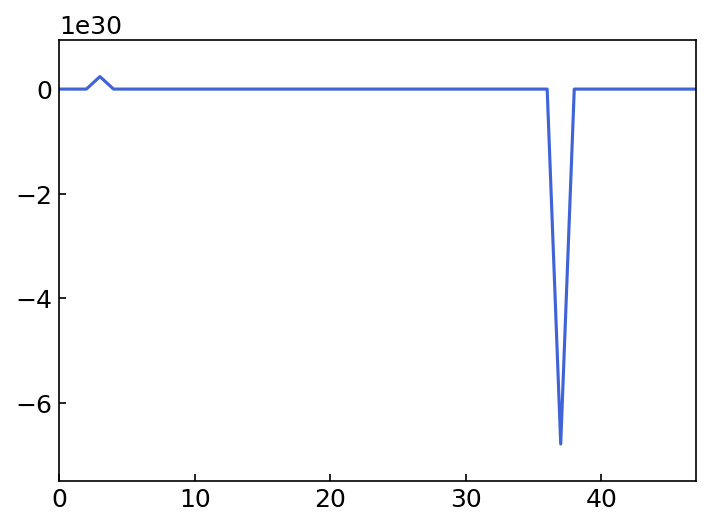

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x6ffffb8af0d0>

In [66]:
plt.clf()
plt.plot(angles/pi)

In [1045]:
(-1+sqrt(1+sqrt(4pi*lB[1])))/2

0.7260971157765197

In [1552]:
sum(sequence)

2.0

In [ ]:
sequence = ones(50)
# sequence = rand([-1, 1],50)
sequence[1:25] .= -1

sequence[20:2:25] .*= -1
sequence[27:2:31] .*= -1
sum(sequence)

0.0

In [57]:
@show sequence

sequence = [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


50-element Vector{Float64}:
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  ⋮
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0
  1.0

In [ ]:
N = 100000
Neta = 10
sequence = ones(50)
# sequence = rand([-1, 1],50)
sequence[1:25] .= -1

sequence[20:2:25] .*= -1
sequence[27:2:31] .*= -1
# sequence[1:2:Int(length(sequence))] .= -1
# sequence[6:10] .= -1
# sequence[16:20] .= -1
# sequence[26:30] .= -1
# sequence[36:40] .= -1
# sequence[46:50] .= -1
# sequence[5] = 0
# Generate random uniform angles for the sequence from pi/3 to 5pi/3
Angles = zeros(length(sequence)-2,Neta)*2pi/4
Fmin = zeros(Neta)
# angles[1:2:end] .*=-1
# angles[Int(length(sequence)/2)-1] = pi/2.1
# angles[Int(length(sequence)/2)] = pi/2.1
lB = [4.0]

eta = LinRange(0.1, pi/6, Neta)

Gamma = @. (-1+sqrt(1+sqrt(4pi*lB[1]*eta*3/pi)))/2
# Re2e = zeros(length(Gamma),length(lB))
# angles = zeros(length(sequence)-2,N)
F = zeros(N)
idxend = N
alpha = 1e-5
for k in 1:1
    # angles = pi/4*ones(length(sequence)-2)
    # angles[2:2:end] .*= -1
    # angles[Int((length(sequence)-2)/2), 1] = pi/2*0.65
    # angles[Int((length(sequence)-2)/2)+1, 1] = pi/2*0.65
    for j in 1:1
        
        # # angles[1:2:end, 1] .*=-1
        
        F = zeros(N)

        F[1], dF, HF = LiquidStateTheory.electrostatic_F_grad_hess(angles, sequence; lB=lB[k], Γ=Gamma[j], η=eta[j], min_sep=2)
        println(norm(dF))
        for i in 2:N
            while true
                _, dF, HF = LiquidStateTheory.electrostatic_F_grad_hess(angles, sequence; lB=lB[k], Γ=Gamma[j], η=eta[j], min_sep=2)
                # idx_max = argmax(abs.(dF))
                angles_new = angles .- alpha*dF./norm(dF)
                F[i], _ = LiquidStateTheory.electrostatic_F_grad_hess(angles_new, sequence; lB=lB[k], Γ=Gamma[j], η=eta[j], min_sep=2)
                # println(F[i])
                if F[i] > F[i-1]
                    # println("Restarting")
                    alpha *= 0.5
                else
                    angles = angles_new
                    alpha = max(alpha*2, 1e-5)
                    break
                end
            end
            if mod(i, 100) == 0
                println("i: ", i, ", F: ", F[i], ", |dF|: ", norm(dF)/48, ", min(eigen): ", minimum(eigvals(HF)))
            end
            if minimum(eigvals(HF)) > 0 && (abs(F[i]-F[i-1]) < 1e-4 || abs((F[i]-F[i-1])/F[i]) < 1e-6) && (norm(dF)/48 < 1e-1)
                idxend = i
                Angles[:,j] = angles
                Fmin[j] = F[i]
                println("Converged at i: ", i, ", F: ", F[i], ", |dF|: ", norm(dF)/48, ", min(eigen): ", minimum(eigvals(HF)))
                break
            end
        end
        Angles[:,j] = angles
        Fmin[j] = F[idxend]
        # _r = pairwise_distances_and_grads(angles[:,end])[1]
        # Re2e[j,k] = _r[1,end]
        # println("Gamma: ", Gamma[j], ", Re2e: ", Re2e[j,k])
        # angles[:, 1] = angles[:,end]
    end
end

149.855782401203
Converged at i: 9, F: -64.03153668779723, |dF|: 0.05003457608233347, min(eigen): 1.4890520549352713


In [63]:
@show angles

angles = [-0.06433631929483331, -0.2883007823715255, -0.5497871893991685, -0.3515270180136588, -0.6428051358204805, -0.3999592727876136, -0.599620734459161, -0.30219350177568055, -0.021038463332281952, -0.028746385078247248, 0.06639896651861617, 0.04146653964946604, 0.015192461309136207, -0.04531701379691205, -0.3044487466852771, -0.8899223665433081, -1.0494310840043555, -1.8840551614980068, 1.8174776392465637, -1.7551995750722702, 1.804290300245657, -1.8058065542290471, 1.8355788889149398, -1.844348235899937, 1.8443599780087043, -1.8355674633117847, 1.805817920381065, -1.8042808703244646, 1.7552092058914006, -1.8174660889270202, 1.8840665942839203, 1.0494445840183262, 0.8899335868662219, 0.3044691147457833, 0.04533109575001033, -0.015190502189955008, -0.04146186668406659, -0.06638984035961558, 0.02875311911203209, 0.021040615806815297, 0.30217984066147996, 0.5996286617740112, 0.3999481469203175, 0.6428116846335061, 0.3515177592648069, 0.5497976177818255, 0.2882943599932354, 0.06433341

48-element Vector{Float64}:
 -0.06433631929483331
 -0.2883007823715255
 -0.5497871893991685
 -0.3515270180136588
 -0.6428051358204805
 -0.3999592727876136
 -0.599620734459161
 -0.30219350177568055
 -0.021038463332281952
 -0.028746385078247248
  0.06639896651861617
  0.04146653964946604
  0.015192461309136207
  ⋮
 -0.04146186668406659
 -0.06638984035961558
  0.02875311911203209
  0.021040615806815297
  0.30217984066147996
  0.5996286617740112
  0.3999481469203175
  0.6428116846335061
  0.3515177592648069
  0.5497976177818255
  0.2882943599932354
  0.06433341009612148

In [1455]:
eigvals(HF)

48-element Vector{Float64}:
     2.08423716951763
     2.225672630023596
     2.630308531505369
     2.7383957464103
     4.42422156711428
     4.557278386555418
     5.43430002693112
     5.62875659494107
     5.757377826609392
     5.932920737967884
     6.048007825466737
     6.090616347315342
     6.128831741611484
     ⋮
   140.02516179628307
   165.43277335147673
   267.6882420424629
   490.09107861648386
  1003.5019450629925
  1323.7508383189424
  2131.4964127306753
  3111.3888456378018
  9524.976570112394
 24158.223327247975
 30664.972165296018
 48946.77291509024

In [ ]:
Neta = 1000
angles_collapsed = [-0.06433631929483331, -0.2883007823715255, -0.5497871893991685, -0.3515270180136588, -0.6428051358204805, -0.3999592727876136, -0.599620734459161, -0.30219350177568055, -0.021038463332281952, -0.028746385078247248, 0.06639896651861617, 0.04146653964946604, 0.015192461309136207, -0.04531701379691205, -0.3044487466852771, -0.8899223665433081, -1.0494310840043555, -1.8840551614980068, 1.8174776392465637, -1.7551995750722702, 1.804290300245657, -1.8058065542290471, 1.8355788889149398, -1.844348235899937, 1.8443599780087043, -1.8355674633117847, 1.805817920381065, -1.8042808703244646, 1.7552092058914006, -1.8174660889270202, 1.8840665942839203, 1.0494445840183262, 0.8899335868662219, 0.3044691147457833, 0.04533109575001033, -0.015190502189955008, -0.04146186668406659, -0.06638984035961558, 0.02875311911203209, 0.021040615806815297, 0.30217984066147996, 0.5996286617740112, 0.3999481469203175, 0.6428116846335061, 0.3515177592648069, 0.5497976177818255, 0.2882943599932354, 0.06433341009612148]


angles_expanded = [0.7853996746621794, -0.7853996069350441, 0.7853995392364477, -0.7853995194898833, 0.7853995013133851, -0.7853994948122138, 0.7853994891156117, -0.7853994868755027, 0.785399485009759, -0.7853994843523262, 0.7853994838992236, -0.7853994841014865, 0.7853994844945325, -0.7853994857880502, 0.7853994874078203, -0.7853994912942834, 0.7853994958924215, -0.7853995073488644, 0.7853995203959631, -0.785399556772014, 0.7853995962681094, -0.7853997315374078, 0.7853998659469003, -0.78540062573712, 0.78540062573712, -0.7853998659469003, 0.7853997315374078, -0.7853995962681094, 0.785399556772014, -0.7853995203959631, 0.7853995073488644, -0.7853994958924215, 0.7853994912942834, -0.7853994874078203, 0.7853994857880502, -0.7853994844945325, 0.7853994841014865, -0.7853994838992236, 0.7853994843523262, -0.785399485009759, 0.7853994868755027, -0.7853994891156117, 0.7853994948122138, -0.7853995013133851, 0.7853995194898833, -0.7853995392364477, 0.7853996069350441, -0.7853996746621794]

F_single_collapsed = zeros(Neta)
F_single_expanded = zeros(Neta)
F_dist_collapsed = zeros(Neta)
F_dist_expanded = zeros(Neta)
F_tot_collapsed = zeros(Neta)
F_tot_expanded = zeros(Neta)

lB = [2.0]
eta = LinRange(0, 0.6, Neta)
Gamma = @. (-1+sqrt(1+sqrt(4pi*lB[1]*eta*3/pi)))/2
for j in 1:Neta
    F_single_collapsed[j], dF, HF = LiquidStateTheory.electrostatic_F_grad_hess(angles_collapsed, sequence; lB=lB[1], Γ=Gamma[j], η=eta[j], min_sep=2)
    lambda = eigvals(HF)[12:end]
    F_dist_collapsed[j] = 1/2*sum(log.(abs.(lambda)))+log(2pi)*(length(lambda))/2
    # F_dist_collapsed[j] = 1/2*log(abs(det(HF)))+log(2pi)*(length(sequence)-2)/2
    F_tot_collapsed[j] = F_single_collapsed[j]+F_dist_collapsed[j]
    F_single_expanded[j], dF, HF = LiquidStateTheory.electrostatic_F_grad_hess(angles_expanded, sequence; lB=lB[1], Γ=Gamma[j], η=eta[j], min_sep=2)
    lambda = eigvals(HF)[12:end]
    F_dist_expanded[j] = 1/2*sum(log.(abs.(lambda)))+log(2pi)*(length(lambda))/2
    # F_dist_expanded[j] = 1/2*log(abs(det(HF)))+log(2pi)*(length(sequence)-2)/2
    F_tot_expanded[j] = F_single_expanded[j]+F_dist_expanded[j]
end


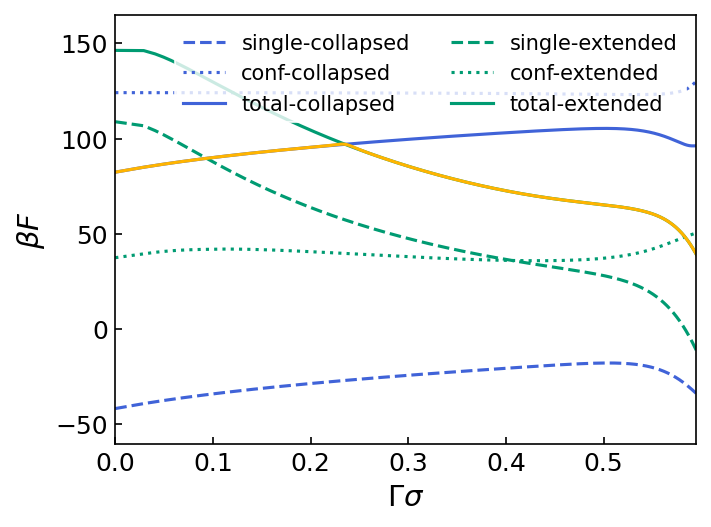

PyObject <matplotlib.legend.Legend object at 0x7011c44aac50>

In [67]:
plt.clf()
plt.plot(Gamma, F_single_collapsed, label="single-collapsed", linestyle="--", color="C0")
plt.plot(Gamma, F_dist_collapsed, label="conf-collapsed", linestyle=":", color="C0")
plt.plot(Gamma, F_tot_collapsed, label="total-collapsed", linestyle="-", color="C0")
plt.plot(Gamma, F_single_expanded, label="single-extended", linestyle="--", color="C1")
plt.plot(Gamma, F_dist_expanded, label="conf-extended", linestyle=":", color="C1")
plt.plot(Gamma, F_tot_expanded, label="total-extended", linestyle="-", color="C1")
plt.plot(Gamma, (F_tot_expanded.*exp.(-F_tot_expanded).+F_tot_collapsed.*exp.(-F_tot_collapsed))./(exp.(-F_tot_expanded).+exp.(-F_tot_collapsed)), label="", linestyle="-", color="C2")
plt.xlabel(L"$\Gamma\sigma$")
plt.ylabel(L"$\beta F$")
plt.legend(loc="upper right", ncol=2)
# plt.ylim(-100,250)

In [1458]:
-1/2*log(abs(det(HF)))+log(2pi)*(length(sequence)-2)/2

-44.613186483989544

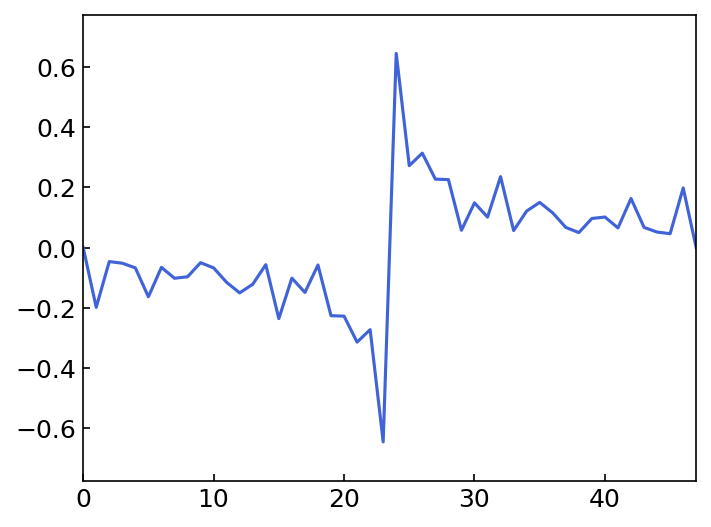

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x6fffd6622850>

In [1467]:
plt.clf()
plt.plot(Angles[:,8]./pi)

In [1449]:
sum(sequence)

0.0

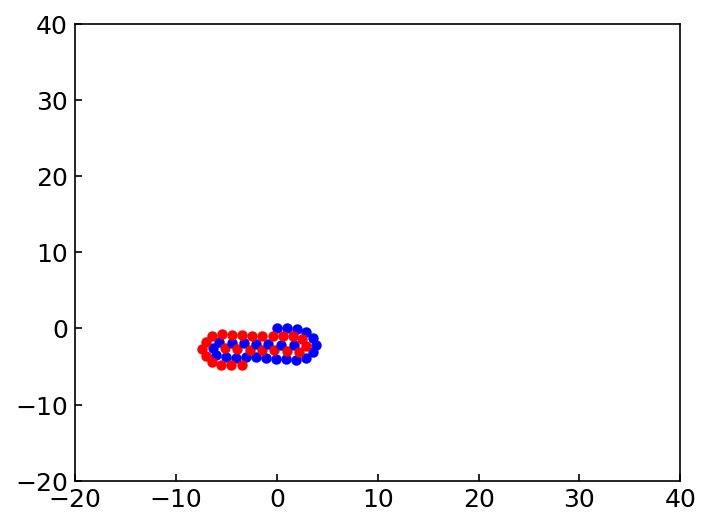

(-20.0, 40.0)

In [ ]:
# angles = Angles[:, 1]
# angles = pi/4*ones(length(sequence)-2)
# angles[2:2:end] .*= -1
# # # angles[1:2:end, 1] .*=-1
# angles[Int((length(sequence)-2)/2), 1] = pi/2*0.95
# angles[Int((length(sequence)-2)/2)+1, 1] = pi/2*0.95
    
points_radius = 2
coords = zeros(length(sequence), 2)
coords[1,:] = [0, 0]
coords[2,:] = [1, 0]
for i in 3:length(sequence)
    coords[i,:] = coords[i-1,:] + [cos(sum(angles[1:i-2])), sin(sum(angles[1:i-2]))]
end
for i in 1:length(sequence)
    if sequence[i] == 1.
        plt.plot(coords[i, 1], coords[i,2], "-o",color="red",markersize=points_radius^2)
    elseif sequence[i] == -1.
        plt.plot(coords[i, 1], coords[i,2], "-o",color="blue",markersize=points_radius^2)
    else
        plt.plot(coords[i, 1], coords[i,2], "-o",color="black",markersize=points_radius^2) 
    end
end
plt.xlim(-20,40)
plt.ylim(-20,40)

In [866]:
sum(sequence)

0.0

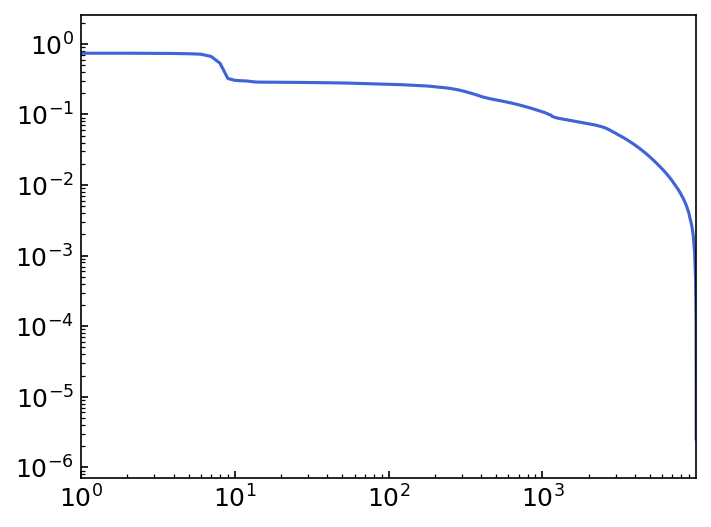

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x6fffe9861390>

In [ ]:
plt.clf()
plt.loglog(abs.((F[1:idxend-1].-F[idxend]))./abs(F[1]))
# plt.ylim(10*F[1],-10*F[1])

In [4]:
using Roots
using SpecialFunctions: erfc

# --- Eq. (9): A(m,n,x,kℓ)
function A_mn(m::Int, n::Int, x::Float64, kℓ::Float64)
    Δ = abs(m - n)
    Δ == 0 && return 0.0
    if kℓ == 0.0
        # kℓ = 0 handled separately
        return 0.0
    end
    s  = 6.0/x
    t1 = sqrt(pi)/4 * s^(3/2) / Δ^(3/2)
    t2 = sqrt(pi)/2 * (kℓ^2) * s^(1/2) / Δ^(1/2)
    y  = (kℓ^2) * x * Δ / 6.0
    t3 = (pi/2) * (kℓ^3) * exp(y) * erfc(sqrt(y))
    return x^(3/2) * (t1 - t2 + t3)
end

# --- Q_el(i,j) at kℓ = 0 from the provided expression
function Qel_i_j_k0(i::Int, j::Int, q::AbstractVector{<:Real})
    N = length(q)
    qf = Float64.(q)
    constpref = (6*pi)^(3/2) / (4*pi)
    acc = 0.0

    # Term 1
    for m in j:i, n in 1:(j-1)
        acc += qf[m]*qf[n]*(m-j)^2/((m-n)^(3/2))
    end
    # Term 2
    for m in (j+1):i, n in j:(m-1)
        acc += qf[m]*qf[n]*((m-n))^(1/2)
    end
    # Term 3
    for m in (i+1):N, n in 1:(j-1)
        acc += qf[m]*qf[n]*(i-j)^2/((m-n)^(3/2))
    end
    # Term 4
    for m in (i+1):N, n in j:i
        acc += qf[m]*qf[n]*(i-n)^2/((m-n)^(3/2))
    end
    return constpref * acc
end

# --- Q_el(i,j) at kℓ = 0 from the provided expression
function Omega_i_j(i::Int, j::Int, omega)
    N = length(q)

    constpref = (3/(2pi))^(3/2)
    acc = 0.0

    # Term 1
    for m in j:i, n in 1:(j-1)
        acc += omega*(m-j)^2/((m-n)^(5/2))
    end
    # Term 2
    for m in (j+1):i, n in j:(m-1)
        acc += omega*((m-n))^(-1/2)
    end
    # Term 3
    for m in (i+1):N, n in 1:(j-1)
        acc += omega*(i-j)^2/((m-n)^(5/2))
    end
    # Term 4
    for m in (i+1):N, n in j:i
        acc += omega*(i-n)^2/((m-n)^(5/2))
    end
    return constpref*acc
end

# --- Eq. (8) general for kℓ > 0
function Qel_i_j(i::Int, j::Int, q::AbstractVector{<:Real}, x::Float64, kℓ::Float64)
    N = length(q)
    qf = Float64.(q)
    acc = 0.0

    # mirror of structure, but with A_mn
    for m in j:i, n in 1:(j-1)
        acc += qf[m]*qf[n]*A_mn(m,n,x,kℓ)*(m-j)^2
    end
    for m in (j+1):i, n in j:(m-1)
        acc += qf[m]*qf[n]*A_mn(m,n,x,kℓ)*(m-n)^2
    end
    for m in (i+1):N, n in 1:(j-1)
        acc += qf[m]*qf[n]*A_mn(m,n,x,kℓ)*(i-j)^2
    end
    for m in (i+1):N, n in j:i
        acc += qf[m]*qf[n]*A_mn(m,n,x,kℓ)*(i-n)^2
    end

    return acc
end

# --- Analytical cubic solution at kℓ=0 (for Ω=0)
function analytic_x(i::Int, j::Int, q::AbstractVector{<:Real}; lb::Float64, l::Float64)
    Δ = abs(i - j)
    Q0 = Qel_i_j_k0(i, j, q)
    Omega = Omega_i_j(i, j, 3.83) / Δ
    # println("Q0 = ", Q0, "\n")
    S  = (2*lb)/(9*l*pi) * (Q0 / Δ)
    # println(S)
    # p = Polynomial([1,0,-1, -S, 0, -Omega])
    p = Polynomial([-Omega,0,-S, -1, 0, 1])
    r = roots(p)
    # pick the only real root
    # println(r)
    y = real(r[abs.(imag.(r)) .< 1e-10][1])
    return y^2
end

# --- Solver for x_{i,i+2}
function x_i_i2(i::Int, q::AbstractVector{<:Real}; lb::Float64, l::Float64, kℓ::Float64)
    j = i + 2
    @assert j ≤ length(q)

    if kℓ == 0.0
        return analytic_x(j, i, q; lb=lb, l=l)
    end

    x0 = analytic_x(j, i, q; lb=lb, l=l)
    Δ = j - i
    C = 2*lb/(9*l*pi)
    f(x) = x^(3/2)*Δ*(1 - 1/x) - C*Qel_i_j(j, i, q, x, kℓ)

    # Robust bracketed solve
    # println(x0)
    x = find_zero(f, x0)
    # println(x)

    return x
end

function x_i_i1(i::Int, q::AbstractVector{<:Real}; lb::Float64, l::Float64, kℓ::Float64)
    j = i + 1
    @assert j ≤ length(q)

    if kℓ == 0.0
        return analytic_x(j, i, q; lb=lb, l=l)
    end

    x0 = analytic_x(j, i, q; lb=lb, l=l)
    Δ = j - i
    C = 2*lb/(9*l*pi)
    f(x) = x^(3/2)*Δ*(1 - 1/x) - C*Qel_i_j(j, i, q, x, kℓ)

    # Robust bracketed solve
    # println(x0)
    x = find_zero(f, x0)
    return x
end

# --- Vectorized helper
x_all_i_i2(q::AbstractVector{<:Real}; lb::Float64, l::Float64, kℓ::Float64) =
    [x_i_i2(i, q; lb=lb, l=l, kℓ=kℓ) for i in 1:(length(q)-2)]
x_all_i_i1(q::AbstractVector{<:Real}; lb::Float64, l::Float64, kℓ::Float64) =
    [x_i_i1(i, q; lb=lb, l=l, kℓ=kℓ) for i in 1:(length(q)-1)]

# ---------------- Example ----------------
N  = 50
q  = vcat(ones(Int, div(N,2)), -ones(Int, N - div(N,2)))  # half +1, half -1
# q = ones(N)
# q[1:2:end] .*= -1
lb, l, kℓ = 5.8, 7.2, 0.0
xij = zeros(Float64, N, N)
for i in 1:N
    for j in (i+1):N
        xij[i,j] = analytic_x(j, i, q; lb=lb, l=l)
        xij[j,i] = xij[i,j]
    end
end
idx = collect(1:N)
rij = sqrt.(abs.(idx .- idx') .* xij)*l

Ri = zeros(Float64, N-1)
for i in 1:(N-1)
    for j in 1:(N-i)
        Ri[i] += rij[j, j+i]
    end
    Ri[i] /= N - i
end

plt.clf()
plt.plot(Ri, label="kℓ=0")
plt.plot(sqrt.(1:N-1)*l, label="ideal")

# println("Numerical x (kℓ>0):", x_all_i_i2(q; lb=lb, l=l, kℓ=0.5))


LoadError: UndefVarError: `Polynomial` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name may be made accessible by importing Polynomials in the current active module Main

In [283]:
q

50-element Vector{Int64}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1

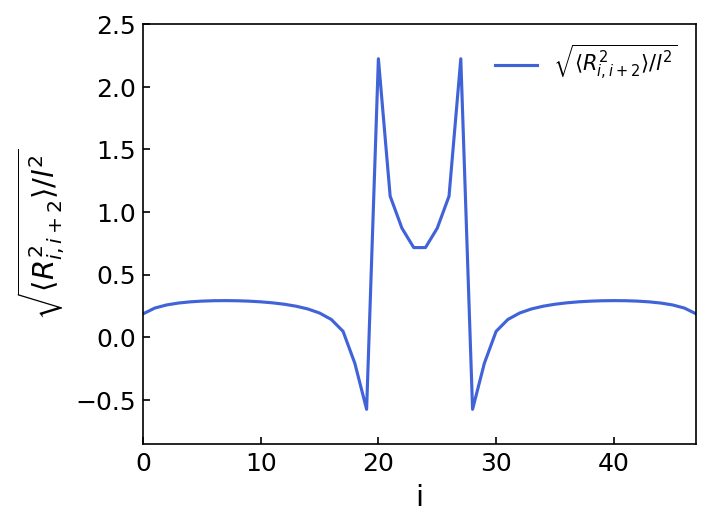

PyObject <matplotlib.legend.Legend object at 0x7f5806c5fad0>

In [143]:
plt.clf()
plt.plot(cosTheta, label=L"$\sqrt{\langle R_{i,i+2}^2 \rangle / l^2}$")
plt.xlabel("i")
plt.ylabel(L"$\sqrt{\langle R_{i,i+2}^2 \rangle / l^2}$")
plt.legend()

In [59]:
sum(sqrt.(2 .*x))/48*0.6

1.7127520478056653

In [45]:
j = 1
i = 3
_Q0 = 0.
for m in j:i
    for n in 1:(j-1)
        _Q0 += q[m]*q[n]*(m-j)^2/((m-n)^(3/2))
    end
end

for m in (j+1):i
    for n in j:(m-1)
        _Q0 += q[m]*q[n]*((m-n))^(1/2)
    end
end

for m in (i+1):N
    for n in 1:(j-1)
        _Q0 += q[m]*q[n]*(i-j)^2/((m-n)^(3/2))
    end
end

for m in (i+1):N
    for n in j:i
        _Q0 += q[m]*q[n]*(i-n)^2/((m-n)^(3/2))
    end
end

_Q0 *= (6pi)^(3/2)/(4pi)

37.6262959956116

In [ ]:
using Polynomials
Q0 = 37.6262959956116
lB = 4.0
l = 1.0
A = 2*lB/l/(9*pi)*Q0
# 2y^3*(1-1/y^2) = A
# 2y^3 - 2y - A = 0
# y^3 - y - A/2 = 0
p = Polynomial([-A/2, 0, -1, 1])
roots(p)[3]^2

4.625715817811703 + 0.0im

In [29]:
A/2

5.3230319981692205

In [13]:
using SpecialFunctions, Polynomials


function Qel_i_j_k0(i::Int, j::Int, q::AbstractVector{<:Real})
    N = length(q)
    qf = Float64.(q)
    constpref = (6*pi)^(3/2) / (4*pi)
    acc = 0.0

    # Term 1
    for m in j:i, n in 1:(j-1)
        acc += qf[m]*qf[n]*(m-j)^2/((m-n)^(3/2))
    end
    # Term 2
    for m in (j+1):i, n in j:(m-1)
        acc += qf[m]*qf[n]*((m-n))^(1/2)
    end
    # Term 3
    for m in (i+1):N, n in 1:(j-1)
        acc += qf[m]*qf[n]*(i-j)^2/((m-n)^(3/2))
    end
    # Term 4
    for m in (i+1):N, n in j:i
        acc += qf[m]*qf[n]*(i-n)^2/((m-n)^(3/2))
    end
    return constpref * acc
end

function analytic_x(i::Int, j::Int, q::AbstractVector{<:Real}; lb::Float64=1.0, l::Float64=1.0)
    Δ = i - j
    Q0 = Qel_i_j_k0(i, j, q)
    # println("Q0 = ", Q0, "\n")
    S  = (2*lb)/(9*l*pi) * (Q0 / Δ)
    p = Polynomial([-S, 0, -1, 1])
    r = roots(p)
    # pick the only real root
    y = real(r[abs.(imag.(r)) .< 1e-10][1])
    return max(y^2, 1e-10)
end

function K(N,i,s1,s2,κ,r)
    α = 1/2*(s1+s2-s1^2/(i-1) - s2^2/(N-i))
    B = (s1/(i-1)+s2/(N-i))*r/2

    if κ == 0
        I_full = 1/B*(erfc(- B/(2sqrt(α))) - erfc(B/(2sqrt(α))))
        Φ₊ = erf(1/(2sqrt(α))-B/(2sqrt(α))) - erf(- B/(2sqrt(α)))
        Φ₋ = erf(1/(2sqrt(α))+B/(2sqrt(α))) - erf(+ B/(2sqrt(α)))
        J_cut = 1/(4pi*B)*(Φ₊ - Φ₋)
        # println("I_full: ", I_full, ", J_cut: ", J_cut)
        return (I_full - J_cut)/(4pi)
    else
        eακ2 = exp(α*κ^2)
        eBκ = exp(B*κ)
        I_full = eακ2/B*(erfc(sqrt(α)*κ - B/(2sqrt(α)))/eBκ - eBκ*erfc(sqrt(α)*κ + B/(2sqrt(α))))
        Φ₊ = erf(1/(2sqrt(α))+sqrt(α)*κ-B/(2sqrt(α))) - erf(sqrt(α)*κ - B/(2sqrt(α)))
        Φ₋ = erf(1/(2sqrt(α))+sqrt(α)*κ+B/(2sqrt(α))) - erf(sqrt(α)*κ + B/(2sqrt(α)))
        J_cut = eακ2/(4pi*B)*(Φ₊/eBκ - eBκ*Φ₋)
        # println("I_full: ", I_full, ", J_cut: ", J_cut)
        return (I_full - J_cut)/(4pi)
    end
end

function H(z,i,κ,r)
    N = length(z)
    A1 = z[i-1]*z[i+1]/r*exp(-κ*r)

    A2 = 0.0
    for j in 1:(i-1)
        for k in 1:(N-i)
            if j == (i-1) && k == (N-i)
                continue
            end
            A2 += z[j]*z[N-k+1]*K(N,i,j,k,κ,r)
        end
    end
    return A1 + A2
end

function H_part(z,i,κ,r)
    N = length(z)
    A1 = z[i-1]*z[i+1]/r*exp(-κ*r)
    return A1
end

function Rij(z,i,κ,r)
    N = length(z)
    _rij = zeros(Float64, (length(z), length(z)))
    # Set diagonal to zero
    for j in 1:length(z)
        _rij[j,j] = 0.0
    end
    # Set first sub-diagonal to 1.0
    for j in 1:(length(z)-1)
        _rij[j,j+1] = 1.0
        _rij[j+1,j] = 1.0
    end
    _rij[i-1,i+1] = r
    _rij[i+1,i-1] = r

    for j in 1:(i-1)
        for k in j+1:(i-1)
            if abs(j-k) == 1
                continue
            end
            _rij[j,k] = sqrt(abs(j-k)*analytic_x(k,j,z[1:i-1]; lb=1.0, l=1.0))
            _rij[k,j] = _rij[j,k]
        end
    end
    for j in (i+1):N
        for k in j+1:N
            if abs(j-k) == 1
                continue
            end
            _rij[j,k] = sqrt(abs(j-k)*analytic_x(k-i,j-i,z[i+1:N]; lb=1.0, l=1.0))
            _rij[k,j] = _rij[j,k]
        end
    end

    for j in 1:(i-1)
        for k in (i+1):N
            s1 = j
            s2 = k - i
            _rij[j,k] = ((k-(i+1))+((i-1)-j) + r^2*((k-(i+1))/(N-(i+1))+(1-j/(i-1))+(k-(i+1))/(N-(i+1))*(1-j/(i-1))/2+1))^(1/2)
            _rij[k,j] = _rij[j,k]
        end
    end

    for j in 1:N
        if j in [i-1,i,i+1]
            continue
        elseif j < i-1
            _rij[i,j] = sqrt(_rij[i-1,j]^2 + 1 + r/2*(1-j/(i-1)))
            _rij[j,i] = _rij[i,j]
        elseif j > i+1
            _rij[i,j] = sqrt(_rij[i+1,j]^2 + 1 + r/2*((j-(i+1))/(N-(i+1))))
            _rij[j,i] = _rij[i,j]
        end
    end
    return _rij
end

Rij (generic function with 1 method)

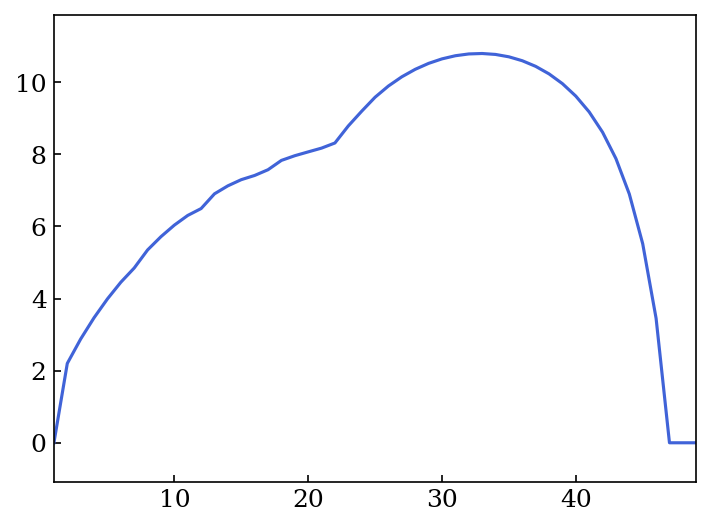

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x73e8dd94a0d0>

In [227]:
z = [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
rij = Rij(z, 2, 0.0, 2.0)
Ri = zeros(length(z)-1)
for i in 2:(length(z)-1)
    for j in 3:(length(z)-i-1)
        Ri[i]+= rij[j,j+i]
    end
    Ri[i] /= (length(z)-i)
end
plt.clf()
plt.plot(1:length(z)-1,Ri, label=L"$\langle R_{i,i+n} \rangle / l$")
# plt.pcolor(rij)
# plt.xticks([])
# plt.yticks([])
# plt.gca().set_aspect("equal")

In [ ]:
rij = Rij(z, 2, 0.0, 2.0)
plt.clf()
plt.pcolor(rij)

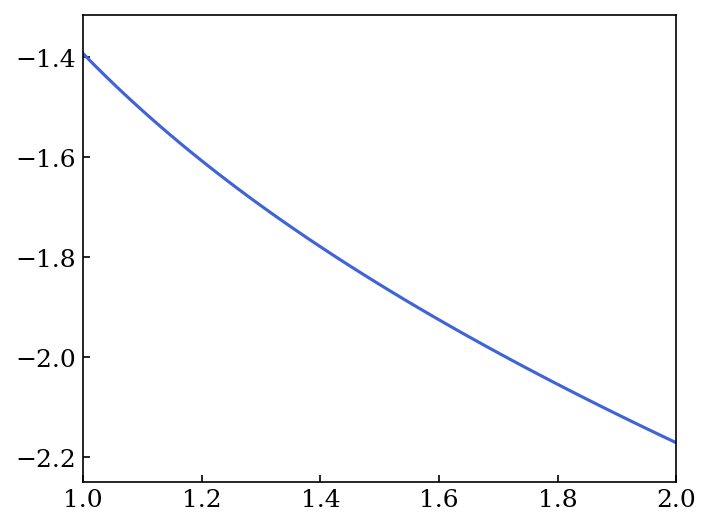

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7aa5e00ab610>

In [4]:
z = ones(50)
z[1:25] .= -1
n = 9
κ = 0.
r = LinRange(1.0,2.0, 100)
Hr = zeros(length(r))
for i in 1:length(r)
    Hr[i] = H(z,n,κ,r[i])
end
plt.clf()
plt.plot(r,Hr)

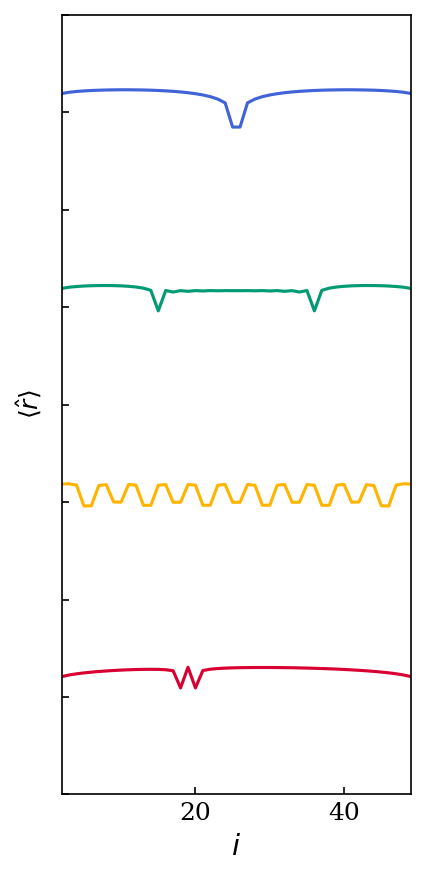

(1.0, 5.0)

In [5]:
seqs = [[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1, 1,-1, 1,-1, 1,-1, 1,-1, 1,-1, 1,-1, 1,-1, 1,-1, 1,-1, 1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [-1,-1,-1,-1,-1, 1, 1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1],
        [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
seqs = reverse(seqs)
plt.clf()

cosomega = LinRange(-1,0.6,200)
r = sqrt.(2 .-2cosomega)
kappa = 0.0
lB = 1.0

# create 4 vertical subplots that share the x-axis
fig, ax = plt.subplots(1, 1, figsize=(3, 6), sharex=true, sharey=true)
rMean = []
for (idx, s) in enumerate(seqs)
    # ax = axs[idx]
    rMean = zeros(length(s)-2)
    for i in 2:(length(s)-1)
        Hvals = [H(s, i, 0.0, ri) for ri in r]
        oMean = sum(cosomega .* exp.(-lB .* Hvals)) / sum(exp.(-lB .* Hvals))
        rMean[i-1] = sqrt(2 .- 2*oMean)
    end
    xidx = collect(2:(length(s)-1))  # monomer indices corresponding to rMean entries
    ax.plot(xidx, rMean.+1*(idx-1), "-", color="C$(4-idx)")
    # ax.set_ylim(1.0, 2.0)
    # ax.set_ylabel("⟨r⟩")
    # hide x labels on all but the bottom axis so the panels look connected
    if idx < length(seqs)
        # ax.tick_params(labelbottom=false)
    else
        ax.set_xlabel(L"i")
    end
    # optionally remove the top/bottom spines for tighter visual connection:
    # ax.spines["top"].set_visible(false)
    # ax.spines["bottom"].set_visible(false) # comment out if you prefer bottom spine on last panel
end
ax.set_yticklabels([])
ax.text(-0.05,0.5,L"\langle \hat{r} \rangle",rotation=90,va="center",ha="right",transform=ax.transAxes)
plt.ylim(1,5)


In [181]:
rMean

48-element Vector{Float64}:
 1.5969204815716747
 1.6034031126875936
 1.6075013616328022
 1.6103818328557922
 1.6124889821081039
 1.6140312043084746
 1.6151193551760046
 1.6158158734028105
 1.61615530437338
 1.6161537581071108
 1.6158133318592867
 1.6151238199545441
 1.6140626080710982
 ⋮
 1.615123819954544
 1.6158133318592867
 1.6161537581071106
 1.61615530437338
 1.6158158734028105
 1.6151193551760046
 1.6140312043084746
 1.6124889821081039
 1.6103818328557922
 1.6075013616328022
 1.6034031126875936
 1.5969204815716747

In [171]:
angles/pi

48-element Vector{Float64}:
 0.4112964809027984
 0.4078566932998679
 0.4056691826913685
 0.4041255867872241
 0.402993175319146
 0.40216262075333004
 0.40157571155325317
 0.4011996456565148
 0.40101626881334956
 0.40101710434461435
 0.40120101844671546
 0.40157330188744944
 0.4021456930650401
 ⋮
 0.4015733018874496
 0.40120101844671546
 0.4010171043446145
 0.40101626881334956
 0.4011996456565148
 0.40157571155325317
 0.40216262075333004
 0.402993175319146
 0.4041255867872241
 0.4056691826913685
 0.4078566932998679
 0.4112964809027984

1.5605312221527652 1.6034031126875936
1.607501361632802 1.577482332742876
1.5886957788591867 1.6103818328557922
1.612488982108104 1.5967255353134178
1.6026089157875356 1.614031204308475
1.615119355176005 1.6068537273693235
1.6097357743987404 1.6158158734028112
1.61615530437338 1.611409461921385
1.6119554688491753 1.6161537581071108
1.6158133318592873 1.6114028563093143
1.6097388780896074 1.615123819954544
1.614062608071098 1.606911620930886
1.6028272630900715 1.6125929656671785
1.610660476085323 1.5973419184441267
1.590246463309107 1.6081868070831145
1.605059139493478 1.5812405604504884
1.5698880188992939 1.6011117832676391
1.5960923896634214 1.555536659705793
1.5371632941657316 1.5895943676461544
1.5809037799376777 1.5130379255778705
1.4798564967405694 1.5685791926430372
1.5488618262338951 1.4297228112482854
1.2147729294546419 1.424866341617673
0.2208527862401669 1.4248663416176717
0.22085278624016744 1.0367010708369877
0.5039944668219654 0.955993511459317
0.4964803159302564 1.4470693

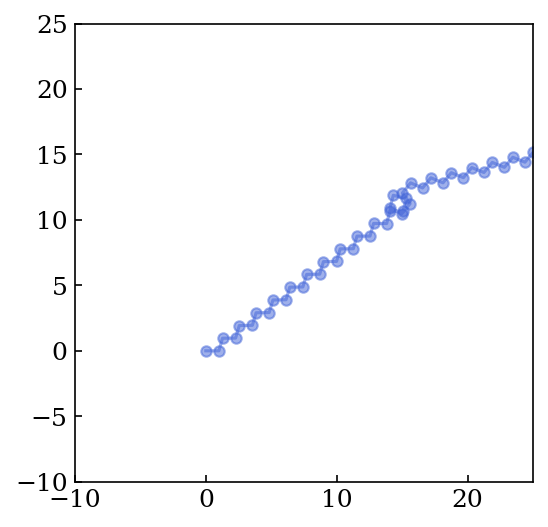

In [199]:
using LinearAlgebra
rcoord = zeros(50, 2)
angles = @. acos(rMean^2/2 - 1)
_rijp = nothing
rcoord[1,:] = [0, 0]
rcoord[2,:] = [1, 0]
_anglesp = angles[1]
_anglesm = angles[1]
rcoord[3,:] = [1+cos(_anglesp), sin(_anglesp)]
for i in 4:50
    _anglesp += angles[i-2]
    _anglesm += -angles[i-2]
    _rp = rcoord[i-1,:] + [cos(_anglesp), sin(_anglesp)]
    _rm = rcoord[i-1,:] + [cos(_anglesm), sin(_anglesm)]
    _rijp = sqrt.(sum((_rp .- rcoord[1:i-2,:]').^2, dims=1))[:]
    _rijm = sqrt.(sum((_rm .- rcoord[1:i-2,:]').^2, dims=1))[:]

    _Up = sum(z[i].*z[1:i-2]./_rijp[1:i-2])
    _Um = sum(z[i].*z[1:i-2]./_rijm[1:i-2])
    println(minimum(_rijp), " ", minimum(_rijm))
    # println(_rp)
    if _Up < _Um || any(_rijm .< 0.8)
        rcoord[i,:] .= _rp
        _anglesm = deepcopy(_anglesp)
    elseif _Up > _Um || any(_rijp .< 0.8)
        rcoord[i,:] .= _rm
        _anglesp = deepcopy(_anglesm)
    elseif _Up < _Um 
        rcoord[i,:] .= _rp
        _anglesm = deepcopy(_anglesp)
    else
        rcoord[i,:] .= _rm
        _anglesp = deepcopy(_anglesm)
    end
    # println(rcoo/rd[i,:])
end

plt.clf()
plt.plot(rcoord[:, 1], rcoord[:, 2], "-o", alpha=0.5)
plt.xlim(-10,25)
plt.ylim(-10,25)
plt.gca().set_aspect("equal")

In [189]:
rMean

48-element Vector{Float64}:
 1.5969204815716747
 1.6034031126875936
 1.6075013616328022
 1.6103818328557922
 1.6124889821081039
 1.6140312043084746
 1.6151193551760046
 1.6158158734028105
 1.61615530437338
 1.6161537581071108
 1.6158133318592867
 1.6151238199545441
 1.6140626080710982
 ⋮
 1.615123819954544
 1.6158133318592867
 1.6161537581071106
 1.61615530437338
 1.6158158734028105
 1.6151193551760046
 1.6140312043084746
 1.6124889821081039
 1.6103818328557922
 1.6075013616328022
 1.6034031126875936
 1.5969204815716747

In [190]:
sum((rcoord[1:48, :] .- rcoord[3:50, :]).^2, dims=2).^(1/2)

48×1 Matrix{Float64}:
 1.5969204815716747
 1.6034031126875936
 1.607501361632802
 1.6103818328557922
 1.612488982108104
 1.614031204308475
 1.615119355176005
 1.6158158734028112
 1.61615530437338
 1.6161537581071108
 1.6158133318592873
 1.615123819954544
 1.6140626080710982
 ⋮
 1.615123819954543
 1.6158133318592887
 1.6161537581071108
 1.6161553043733796
 1.6158158734028103
 1.6151193551760026
 1.6140312043084746
 1.612488982108106
 1.610381832855795
 1.607501361632805
 1.6034031126875954
 1.5969204815716742

In [20]:
z

50-element Vector{Int64}:
 -1
  1
 -1
  1
  1
  1
 -1
 -1
 -1
 -1
  1
  1
 -1
  ⋮
  1
 -1
  1
  1
 -1
  1
  1
  1
 -1
 -1
  1
 -1

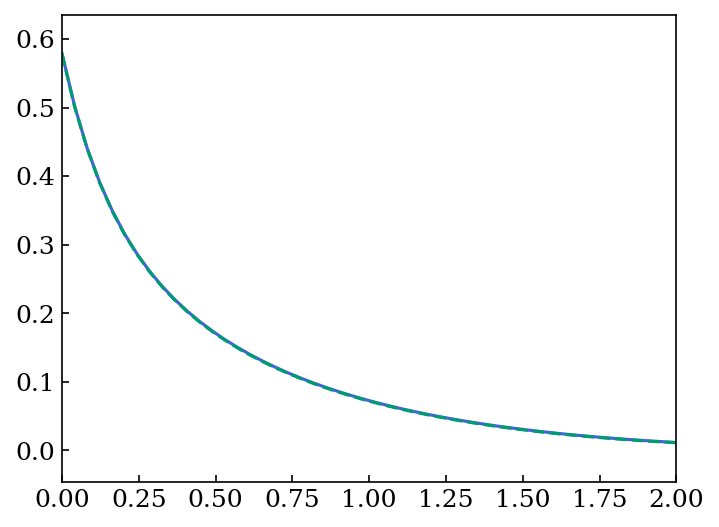

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7feb033968d0>

In [49]:
using GaussQuadrature
z = ones(50)
z[1:10] .= -1
# z = rand([-1, 1],50)
# z[20:2:0] .*= -1
# z[1:5] .= -1
# z[11:15] .= -1
# z[21:25] .= -1
# z[31:35] .= -1
# z[41:45] .= -1

ω = LinRange(pi/3,pi, 100)
r = sqrt.(2 .- 2*cos.(ω))
rGauss, wGauss = legendre(15)
ωGauss = @. 0.5*(rGauss+1)*(pi - pi/3) + pi/3
rGauss = @. sqrt(2 .- 2*cos(ωGauss))
wGauss = @. wGauss/2
dω = ω[2]-ω[1]
kappa = LinRange(0,2,50)
F = zeros(length(kappa))
F_gauss = zeros(length(kappa))
for (ki, kappa) in enumerate(kappa)
    for i in 2:(length(z)-1)
        Hvals = [H(z,i,kappa,ri) for ri in r]
        F[ki] += -log.(sum(exp.(-Hvals))/100)
        Hvals_gauss = [H(z,i,kappa,ri) for ri in rGauss]
        F_gauss[ki] += -log.(sum(exp.(-Hvals_gauss).*wGauss))
    end
end
plt.clf()
plt.plot(kappa,F./48)
plt.plot(kappa,F_gauss./48, linestyle="--")

In [52]:
ωGauss

15-element Vector{Float64}:
 1.0597717569215825
 1.112884701069448
 1.2061552453369633
 1.3357866280694308
 1.4964744414361324
 1.6816407769327313
 1.883705139843864
 2.0943951023931957
 2.305085064942527
 2.50714942785366
 2.6923157633502592
 2.8530035767169606
 2.9826349594494275
 3.0759055037169425
 3.1290184478648086

In [43]:
r

100-element Vector{Float64}:
 0.9999999999999999
 1.0182649201366938
 1.036415908835191
 1.054450935221005
 1.0723679813944182
 1.0901650426562632
 1.1078401277322205
 1.12539125899562
 1.1428164726887144
 1.160113819142396
 1.177281362994346
 1.1943171834055724
 1.2112193742753332
 ⋮
 1.986476715483886
 1.9888215427646134
 1.9909438451461692
 1.9928433851687746
 1.9945199502970448
 1.9959733529437689
 1.9972034304908985
 1.9982100453077436
 1.9989930847663702
 1.9995524612542037
 1.9998881121838301
 2.0

In [12]:
sum(z[1:end-1] .* z[2:end] .< 0)

11